In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
# Read data into DataFrame from CSV file
# cyclone_df = pd.read_csv("Cyclone_ML.csv")
cyclone_df = pd.read_csv("../data_ml.csv")

# Select features for machine learning and assign to X
selected_features = cyclone_df[["SURFACE_CODE",	"CYC_TYPE", "LAT", "LON", "CENTRAL_PRES", "MAX_WIND_SPD"]]
X = selected_features

# Set y to compass direction of cyclone based on wind direction degree
# y = cyclone_df["MAX_REP_WIND_DIR"]
y = cyclone_df["CENTRAL_INDEX (CI)"].values.reshape(-1,1)

print(X.shape, y.shape)

(1691, 6) (1691, 1)


In [22]:
X

,SURFACE_CODE,CYC_TYPE,LAT,LON,CENTRAL_PRES,MAX_WIND_SPD
0,1.0,20.0,-11.00,92.60,1001.0,12.9
1,1.0,20.0,-11.10,93.10,1002.0,12.9
2,1.0,20.0,-11.10,94.20,1003.0,12.9
3,1.0,20.0,-11.10,94.60,1000.0,12.9
4,1.0,20.0,-11.20,95.00,1002.0,12.9
...,...,...,...,...,...,...
1686,2.0,30.0,-14.30,126.40,986.0,20.6
1687,4.0,21.0,-12.73,130.61,999.0,20.6
1688,2.0,30.0,-12.54,130.72,993.0,18.0
1689,2.0,30.0,-12.41,130.99,995.0,18.0


In [23]:
y

array([[2.06400481],
       [1.95045442],
       [1.8292585 ],
       ...,
       [2.80160494],
       [2.63810555],
       [2.72118357]])

In [24]:
    # train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [25]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [26]:
    # Linear Regression Model
    model = LinearRegression()

    # Fit the model to the training data and calculate the scores for the training and testing data
    model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [28]:
    training_score = model.score(X_train_scaled, y_train_scaled)
    testing_score = model.score(X_test_scaled, y_test_scaled)
    
    print(f"Training Data Score: {training_score}")
    print(f"Testing Data Score: {testing_score}")

Training Data Score: 0.966740432830516
Testing Data Score: 0.9704505427148828


In [31]:
    predictions = model.predict(X_test)
    predictions

array([[-750.29312941],
       [-743.96788629],
       [-705.72181265],
       [-730.71715566],
       [-711.18270751],
       [-744.92291802],
       [-742.76646656],
       [-750.25276292],
       [-732.95245975],
       [-744.02184477],
       [-743.98500363],
       [-677.30654278],
       [-736.94470591],
       [-733.49594269],
       [-740.53422959],
       [-741.0621579 ],
       [-739.99853926],
       [-702.93667367],
       [-758.01324073],
       [-731.19675635],
       [-743.76937091],
       [-685.94238232],
       [-740.10422122],
       [-714.68361126],
       [-731.85730248],
       [-727.75749219],
       [-738.50004556],
       [-744.32201596],
       [-748.18286135],
       [-743.12312096],
       [-706.74516506],
       [-734.05328532],
       [-714.7470064 ],
       [-745.80047987],
       [-697.83065791],
       [-724.64352802],
       [-714.23406436],
       [-736.79565861],
       [-751.54303675],
       [-742.28687251],
       [-734.85695432],
       [-736.684

Text(0.5, 1.0, 'Residual Plot')

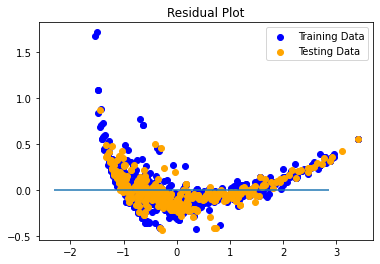

In [32]:
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")

In [33]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.026461238939230327, R2: 0.9704505427148828
